In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

In [38]:
# Load dataset
df = pd.read_csv('Dataset.csv')
df

,Temp(C),Temp(K),Humidity,Pressure,Soil Moisture,Smoke Density,Air Density,Wind Speed,FFMC,DMC,DC,ISI,BUI,FWI,Risk
0,59.96,333.11,64.49,903.94,36.77,32.28,2.71,7.78,13.79,25.55,68.24,10.73,46.89,50.31,Extreme
1,59.65,332.80,50.43,900.40,17.82,63.86,2.71,9.58,15.03,15.40,28.21,14.40,21.80,31.39,High
2,59.10,332.25,85.03,901.12,2.76,56.84,2.71,4.16,9.99,1.50,3.91,4.16,2.71,1.13,Low
3,59.94,333.09,58.11,901.25,3.46,50.65,2.71,5.19,10.69,1.90,4.38,5.55,3.14,1.74,Low
4,59.43,332.58,37.06,901.47,16.41,41.19,2.71,2.59,14.42,24.05,20.99,3.73,22.52,8.40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10.76,283.91,81.61,1021.00,20.66,66.04,3.60,5.08,5.48,14.13,38.59,2.78,26.36,7.33,Low
7996,10.97,284.12,61.64,1021.73,29.55,34.49,3.60,8.22,7.50,40.67,45.86,6.17,43.27,26.70,Medium
7997,10.28,283.43,64.18,1022.01,28.61,69.82,3.61,6.70,12.86,16.30,55.37,8.62,35.84,30.89,High
7998,10.36,283.51,85.58,1023.75,32.44,33.71,3.61,8.01,14.45,17.43,35.00,11.57,26.21,30.32,High


In [ ]:
 # Encode 'Risk' column as numeric before calculating correlation
risk_map = {'Low': 0, 'Medium': 1, 'High': 2,'Extreme':3}
inverse_map = {v: k for k, v in risk_map.items()}
df['Risk'] = df['Risk'].map(risk_map)


In [40]:
df


,Temp(C),Temp(K),Humidity,Pressure,Soil Moisture,Smoke Density,Air Density,Wind Speed,FFMC,DMC,DC,ISI,BUI,FWI,Risk
0,59.96,333.11,64.49,903.94,36.77,32.28,2.71,7.78,13.79,25.55,68.24,10.73,46.89,50.31,3
1,59.65,332.80,50.43,900.40,17.82,63.86,2.71,9.58,15.03,15.40,28.21,14.40,21.80,31.39,2
2,59.10,332.25,85.03,901.12,2.76,56.84,2.71,4.16,9.99,1.50,3.91,4.16,2.71,1.13,0
3,59.94,333.09,58.11,901.25,3.46,50.65,2.71,5.19,10.69,1.90,4.38,5.55,3.14,1.74,0
4,59.43,332.58,37.06,901.47,16.41,41.19,2.71,2.59,14.42,24.05,20.99,3.73,22.52,8.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10.76,283.91,81.61,1021.00,20.66,66.04,3.60,5.08,5.48,14.13,38.59,2.78,26.36,7.33,0
7996,10.97,284.12,61.64,1021.73,29.55,34.49,3.60,8.22,7.50,40.67,45.86,6.17,43.27,26.70,1
7997,10.28,283.43,64.18,1022.01,28.61,69.82,3.61,6.70,12.86,16.30,55.37,8.62,35.84,30.89,2
7998,10.36,283.51,85.58,1023.75,32.44,33.71,3.61,8.01,14.45,17.43,35.00,11.57,26.21,30.32,2


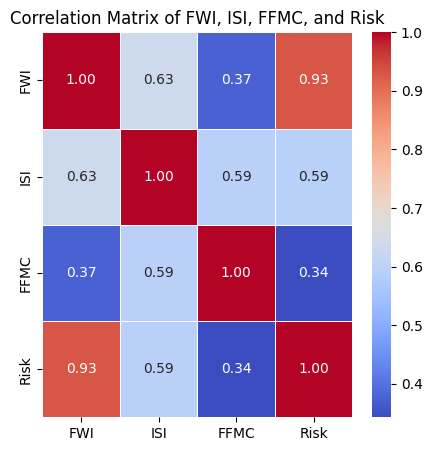

In [41]:
# Correlation matrix 
plt.figure(figsize=(5, 5))
correlation_matrix = df[['FWI', 'ISI', 'FFMC', 'Risk']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of FWI, ISI, FFMC, and Risk')
plt.show()

In [42]:
# Prepare features (X) and labels (y)
X = df.drop(columns=['Risk'])
y = df['Risk']  # Already encoded manually

print("Features (X):")
print(X.head())  # Show first 5 rows of X

print("Labels (y):")
print(y.head())  # Show first 5 labels

Features (X):
   Temp(C)  Temp(K)  Humidity  Pressure  Soil Moisture  Smoke Density  \
0    59.96   333.11     64.49    903.94          36.77          32.28   
1    59.65   332.80     50.43    900.40          17.82          63.86   
2    59.10   332.25     85.03    901.12           2.76          56.84   
3    59.94   333.09     58.11    901.25           3.46          50.65   
4    59.43   332.58     37.06    901.47          16.41          41.19   

   Air Density  Wind Speed   FFMC    DMC     DC    ISI    BUI    FWI  
0         2.71        7.78  13.79  25.55  68.24  10.73  46.89  50.31  
1         2.71        9.58  15.03  15.40  28.21  14.40  21.80  31.39  
2         2.71        4.16   9.99   1.50   3.91   4.16   2.71   1.13  
3         2.71        5.19  10.69   1.90   4.38   5.55   3.14   1.74  
4         2.71        2.59  14.42  24.05  20.99   3.73  22.52   8.40  
Labels (y):
0    3
1    2
2    0
3    0
4    0
Name: Risk, dtype: int64


In [43]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6400, 14)
X_test shape: (1600, 14)
y_train shape: (6400,)
y_test shape: (1600,)


In [44]:
# Catboost
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=100,
    random_state=42
)

cat_model.fit(X_train, y_train)

# ✅ Predict and evaluate
cat_pred = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, cat_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


0:	learn: 1.1186425	total: 49.1ms	remaining: 24.5s
100:	learn: 0.0049577	total: 1.72s	remaining: 6.78s
200:	learn: 0.0022864	total: 3.35s	remaining: 4.99s
300:	learn: 0.0014078	total: 5.07s	remaining: 3.35s
400:	learn: 0.0009631	total: 7.34s	remaining: 1.81s
499:	learn: 0.0007261	total: 9.53s	remaining: 0us
Accuracy: 99.81%


In [45]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree Accuracy: {accuracy:.2f}%")

# Decode predictions if you have inverse_map
decoded_preds = [inverse_map[i] for i in y_pred]

# Example: print actual vs predicted
for actual, pred in zip([inverse_map[i] for i in y_test[:10]], decoded_preds[:10]):
    print(f"Actual: {actual}, Predicted: {pred}")


Decision Tree Accuracy: 100.00%
Actual: Low, Predicted: Low
Actual: Low, Predicted: Low
Actual: High, Predicted: High
Actual: Low, Predicted: Low
Actual: Low, Predicted: Low
Actual: Low, Predicted: Low
Actual: Medium, Predicted: Medium
Actual: Low, Predicted: Low
Actual: Low, Predicted: Low
Actual: Low, Predicted: Low


In [46]:
# XGBoost 
print("\n----- XGBoost -----")

# Train the model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Decode predictions and actual values using manual map
decoded_xgb_preds = [inverse_map[p] for p in xgb_pred]
decoded_y_test = [inverse_map[a] for a in y_test]

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred) * 100
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")

# Show results
print("\nXGBoost: Actual vs Predicted")
for actual, pred in zip(decoded_y_test[:10], decoded_xgb_preds[:10]):  # Display first 10
    print(f"Actual: {actual} - Predicted: {pred}")





----- XGBoost -----
XGBoost Accuracy: 99.69%

XGBoost: Actual vs Predicted
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low


In [47]:
# ---------- LightGBM ----------
print("\n----- LightGBM -----")
# Fix whitespace in feature names (important!)
X_train.columns = X_train.columns.str.strip().str.replace(' ', '_')
X_test.columns = X_test.columns.str.strip().str.replace(' ', '_')

lgb_model = lgb.LGBMClassifier(verbosity=-1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
decoded_lgb_preds = [inverse_map[p] for p in lgb_pred]
lgb_accuracy = accuracy_score(y_test, lgb_pred) * 100
print(f"LightGBM Accuracy: {lgb_accuracy:.2f}%")

print("\nLightGBM: Actual vs Predicted")
for actual, pred in zip(decoded_y_test[:10], decoded_lgb_preds[:10]):
    print(f"Actual: {actual} - Predicted: {pred}")


----- LightGBM -----
LightGBM Accuracy: 99.75%

LightGBM: Actual vs Predicted
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low


In [48]:
# ---------- Random Forest ----------
print("\n----- Random Forest -----")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
decoded_rf_preds = [inverse_map[p] for p in rf_pred]

rf_accuracy = accuracy_score(y_test, rf_pred) * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")

print("\nRandom Forest: Actual vs Predicted")
for actual, pred in zip(decoded_y_test[:10], decoded_rf_preds[:10]):
    print(f"Actual: {actual} - Predicted: {pred}")


----- Random Forest -----
Random Forest Accuracy: 100.00%

Random Forest: Actual vs Predicted
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low


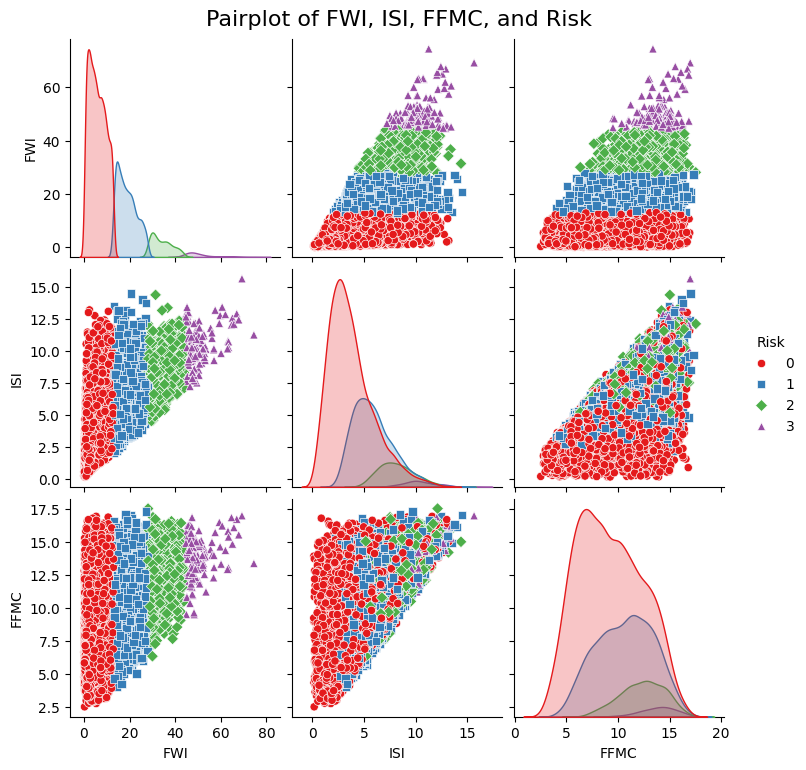

In [49]:
# Pairplot visualization
sns.pairplot(
    df,  # full dataframe
    vars=['FWI', 'ISI', 'FFMC'],  # columns to plot pairwise
    hue='Risk', 
    palette='Set1', 
    markers=["o", "s", "D", "^"]
)
plt.suptitle('Pairplot of FWI, ISI, FFMC, and Risk', size=16, y=1.02)
plt.show()

In [50]:


joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(xgb_model, 'fire_risk_xgb.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(cat_model, 'catboost_model.pkl')
joblib.dump(lgb_model, 'lightgbm_model.pkl')


['lightgbm_model.pkl']